1. Installation et Imports

In [2]:
#!pip install transformers datasets evaluate accelerate
import pandas as pd
import torch
from datasets import load_dataset, Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import evaluate

2. Configuration du GPU

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du périphérique : {device}")


Utilisation du périphérique : cuda


3. Chargement et Nettoyage spécifique pour RoBERTa

In [14]:
from datasets import load_dataset
import pandas as pd

# 1. Chargement du dataset original
dataset = load_dataset("GonzaloA/fake_news")

# 2. Conversion en DataFrame Pandas pour un nettoyage facile
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

def clean_for_roberta(df):
    # Fusionner Titre et Texte (RoBERTa aime le contexte complet)
    # On gère les NaN immédiatement pour éviter l'erreur TypeError
    df['title'] = df['title'].fillna("")
    df['text'] = df['text'].fillna("")
    
    # Création de la colonne finale de texte
    df['full_content'] = df['title'] + " " + df['text']
    
    # On ne garde que l'essentiel
    return df[['full_content', 'label']]

# Application du nettoyage
df_train_clean = clean_for_roberta(df_train)
df_val_clean = clean_for_roberta(df_val)
df_test_clean = clean_for_roberta(df_test)

# 3. Sauvegarde des nouveaux fichiers CSV
df_train_clean.to_csv("data_RoBERTa/train_roberta.csv", index=False)
df_val_clean.to_csv("data_RoBERTa/validation_roberta.csv", index=False)
df_test_clean.to_csv("data_RoBERTa/test_roberta.csv", index=False)

print("Nouveaux fichiers créés : train_roberta.csv, validation_roberta.csv, test_roberta.csv")

Repo card metadata block was not found. Setting CardData to empty.


Nouveaux fichiers créés : train_roberta.csv, validation_roberta.csv, test_roberta.csv


4. Chargement des nouveaux CSV et Initialisation

In [21]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Détection du GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chargement des fichiers depuis ton nouveau dossier
data_files = {
    "train": "data_RoBERTa/train_roberta.csv",
    "validation": "data_RoBERTa/validation_roberta.csv",
    "test": "data_RoBERTa/test_roberta.csv"
}
roberta_datasets = load_dataset('csv', data_files=data_files)

# Initialisation
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

5. Initialisation de RoBERTa

In [5]:
model_name = "roberta-base"

# Le tokenizer de RoBERTa est différent de celui de BERT
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Chargement du modèle avec 2 labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\lamya\anaconda3\envs\torch_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lamya\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and a

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

5. Traitement complet de la Tokenisation

In [22]:
def tokenize_roberta(examples):
    # Sécurité anti-erreurs de type
    texts = [str(x) for x in examples["full_content"]]
    
    result = tokenizer(texts, truncation=True, padding="max_length", max_length=512)
    
    # Renommage crucial pour le Trainer
    result["labels"] = examples["label"]
    return result

# Application du traitement
tokenized_roberta = roberta_datasets.map(
    tokenize_roberta, 
    batched=True,
    remove_columns=roberta_datasets["train"].column_names
)

# Vérification : Doit afficher ['input_ids', 'attention_mask', 'labels']
print("Colonnes prêtes pour l'entraînement :", tokenized_roberta["train"].column_names)

Map:   0%|          | 0/8117 [00:00<?, ? examples/s]

Colonnes prêtes pour l'entraînement : ['input_ids', 'attention_mask', 'labels']


6. Définition des métriques d'évaluation

In [26]:
import evaluate
import numpy as np

def compute_metrics(eval_pred):
    # Chargement des différentes métriques
    accuracy_metric = evaluate.load("accuracy")
    f1_metric = evaluate.load("f1")
    precision_metric = evaluate.load("precision")
    recall_metric = evaluate.load("recall")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Calcul de chaque score
    results = {}
    results.update(accuracy_metric.compute(predictions=predictions, references=labels))
    results.update(f1_metric.compute(predictions=predictions, references=labels))
    results.update(precision_metric.compute(predictions=predictions, references=labels))
    results.update(recall_metric.compute(predictions=predictions, references=labels))
    
    return results

7. Configuration des hyperparamètres (TrainingArguments)

In [27]:
# Configuration de l'entraînement (Version optimisée)
training_args = TrainingArguments(
    output_dir="./results_roberta",
    learning_rate=2e-5,           # Un peu plus rapide que 1e-5
    per_device_train_batch_size=8, # Reste à 8 pour ta VRAM
    per_device_eval_batch_size=8,
    num_train_epochs=2,            # 2 époques au lieu de 3 (gain de temps énorme)
    weight_decay=0.01,
    eval_strategy="steps",         # On évalue tous les X pas pour voir les métriques monter
    eval_steps=500,                # Affichage des scores (F1, Acc, etc.) tous les 500 pas
    save_strategy="steps",
    save_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="f1",    # Le modèle sera choisi selon son meilleur F1-score
    fp16=True,                     # INDISPENSABLE pour ta RTX 3050 Ti
    logging_steps=100,
    report_to="none"
)

8. Initialisation et Lancement de l'Entraînement

In [28]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_roberta["train"],
    eval_dataset=tokenized_roberta["validation"],
    compute_metrics=compute_metrics,
)

print("Lancement de l'entraînement de RoBERTa sur les nouvelles données...")
trainer.train()

Lancement de l'entraînement de RoBERTa sur les nouvelles données...


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,0.059200,0.052272,0.981643,0.982753,1.000000,0.966090
1000,0.049200,0.037781,0.981767,0.982870,1.000000,0.966318
1500,0.093400,0.108232,0.981767,0.982870,1.000000,0.966318
2000,0.035000,0.038411,0.980535,0.981734,0.997650,0.966318
2500,0.054300,0.033572,0.981767,0.982870,1.000000,0.966318
3000,0.030200,0.041568,0.982259,0.983353,0.999295,0.967911
3500,0.047900,0.031005,0.985339,0.986370,0.992852,0.979973
4000,0.032700,0.059156,0.982383,0.983811,0.978824,0.988848
4500,0.048000,0.043477,0.985586,0.986538,0.997673,0.975649
5000,0.025500,0.053605,0.985586,0.986700,0.985692,0.987711


TrainOutput(global_step=6090, training_loss=0.04441196503506114, metrics={'train_runtime': 27478.2148, 'train_samples_per_second': 1.773, 'train_steps_per_second': 0.222, 'total_flos': 1.281508706236416e+16, 'train_loss': 0.04441196503506114, 'epoch': 2.0})

9. Évaluation finale, Sauvegarde et Matrice de Confusion

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Évaluation finale sur le dataset de TEST
print("Évaluation sur le dataset de test...")
test_results = trainer.evaluate(tokenized_roberta["test"])
print(f"Résultats finaux : {test_results}")

Évaluation sur le dataset de test...


Résultats finaux : {'eval_loss': 0.0479365773499012, 'eval_accuracy': 0.9858322040162621, 'eval_f1': 0.986682107701216, 'eval_precision': 0.9906976744186047, 'eval_recall': 0.9826989619377162, 'eval_runtime': 788.4382, 'eval_samples_per_second': 10.295, 'eval_steps_per_second': 1.287, 'epoch': 2.0}


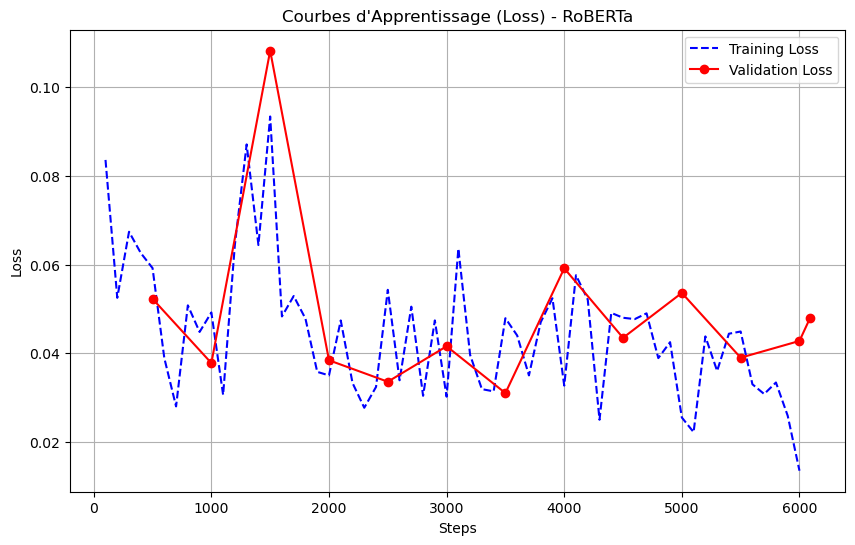

In [30]:
# Extraction des logs de l'historique d'entraînement
history = trainer.state.log_history

# On sépare les logs d'entraînement et d'évaluation
train_loss = [log["loss"] for log in history if "loss" in log]
eval_loss = [log["eval_loss"] for log in history if "eval_loss" in log]
steps = [log["step"] for log in history if "loss" in log]
eval_steps = [log["step"] for log in history if "eval_loss" in log]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(steps, train_loss, label='Training Loss', color='blue', linestyle='--')
if eval_loss:
    plt.plot(eval_steps, eval_loss, label='Validation Loss', color='red', marker='o')

plt.title('Courbes d\'Apprentissage (Loss) - RoBERTa')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# 2. Prédictions pour la matrice de confusion
predictions = trainer.predict(tokenized_roberta["test"])
y_preds = np.argmax(predictions.predictions, axis=-1)
y_true = tokenized_roberta["test"]["labels"]

In [32]:
# 3. Affichage du rapport de classification détaillé
print("\nClassification Report :")
print(classification_report(y_true, y_preds, target_names=["True", "Fake"]))


Classification Report :
              precision    recall  f1-score   support

        True       0.98      0.99      0.98      3782
        Fake       0.99      0.98      0.99      4335

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117



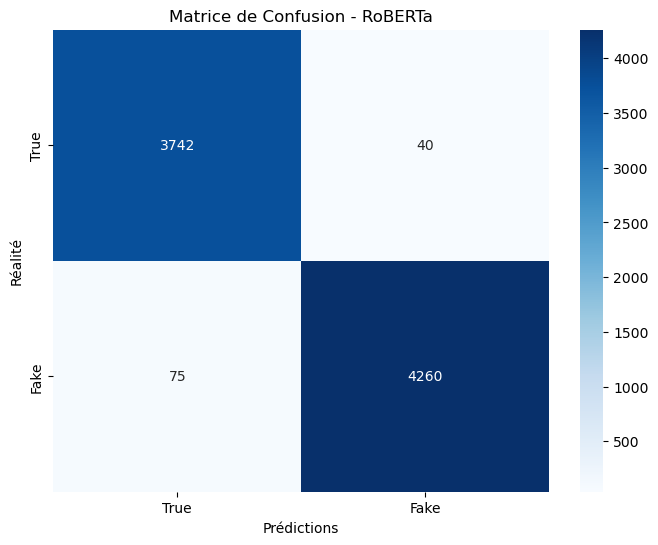

In [33]:

# 4. Génération de la Matrice de Confusion
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["True", "Fake"], yticklabels=["True", "Fake"])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion - RoBERTa')
plt.show()

In [34]:
# 5. Sauvegarde locale du modèle final
trainer.save_model("./roberta-fake-news-ENG")
tokenizer.save_pretrained("./roberta-fake-news-ENG")
print("Modèle sauvegardé localement dans le dossier 'roberta-fake-news-ENG'")

Modèle sauvegardé localement dans le dossier 'roberta-fake-news-ENG'


10. Push vers Hugging Face Hub

In [35]:
from huggingface_hub import notebook_login

# 1. Connexion à ton compte (un champ apparaîtra pour coller ton Token)
# Tu peux trouver ton token ici : https://huggingface.co/settings/tokens
notebook_login()

# 2. Définition du nom du dépôt
# Remplace "LamT45" par ton nom d'utilisateur Hugging Face si nécessaire
repo_name = "LamT45/roberta-fake-news-ENG"

# 3. Envoi du modèle et du tokenizer
print(f"Envoi du modèle vers {repo_name}...")
model.push_to_hub(repo_name)
tokenizer.push_to_hub(repo_name)

print("Modèle RoBERTa est maintenant disponible sur Hugging Face.")

Envoi du modèle vers LamT45/roberta-fake-news-ENG...


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

README.md: 0.00B [00:00, ?B/s]

c:\Users\lamya\anaconda3\envs\torch_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lamya\.cache\huggingface\hub\models--LamT45--roberta-fake-news-ENG. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Modèle RoBERTa est maintenant disponible sur Hugging Face.


11. Test "Real-World" (News Politiques)

In [37]:
def predict_politics(text):
    # Préparation du texte
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    
    # Inférence
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        prediction = torch.argmax(probs, dim=-1).item()
        confidence = probs[0][prediction].item()
    
    label = "FAKE 🚩" if prediction == 0 else "TRUE ✅"
    return f"Résultat: {label} ({confidence:.2%} de confiance)"

# --- TESTS SUR DES EXEMPLES POLITIQUES ---
print("Test 1 (Style Fake News):")
print(predict_politics("BREAKING: Secret documents reveal Senate leader accepted millions from foreign lobbyists to rig the election!"))

print("\nTest 2 (Style Information Réelle):")
print(predict_politics("The White House spokesperson confirmed today that the President will meet with European leaders to discuss new trade agreements next Tuesday."))

print("\nTest 3 (Biais partisan):")
print(predict_politics("Unbelievable! This politician's latest speech proves they hate the country and want to destroy our economy for their own gain!"))

Test 1 (Style Fake News):
Résultat: FAKE 🚩 (99.99% de confiance)

Test 2 (Style Information Réelle):
Résultat: TRUE ✅ (99.77% de confiance)

Test 3 (Biais partisan):
Résultat: FAKE 🚩 (99.87% de confiance)
